<a href="https://colab.research.google.com/github/keinerfan/IAP123/blob/Codes/IAP1_svr_morgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.pyplot import plot, xlabel, ylabel, show
import matplotlib.pyplot as plt  # Importing plt for show() function
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Load the dataset

data = pd.read_csv('https://raw.githubusercontent.com/keinerfan/CIAP1/DATA-SETS/IAP1_06_morgan_fp.csv')


y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )

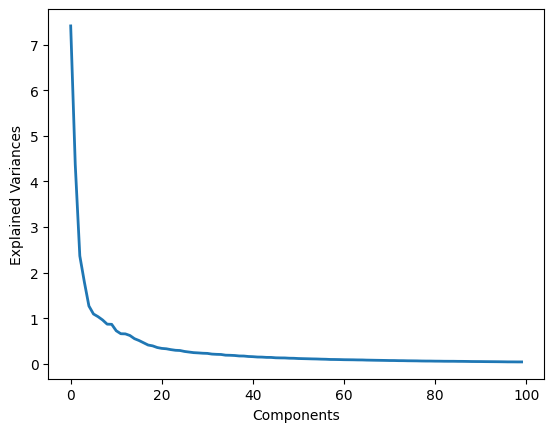

In [2]:

pca = PCA(n_components=100).fit(data)
plot(pca.explained_variance_, linewidth=2)
xlabel('Components')
ylabel('Explained Variances')  # Corrected spelling
plt.show()  # Corrected function call


In [3]:
pca = PCA(n_components= 75)
pca.fit(data)
merged_data  = pca.transform(data)

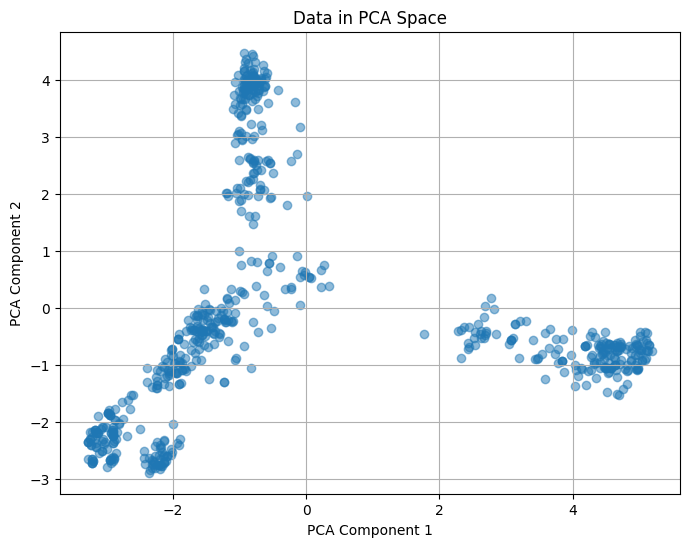

In [4]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8, 6))
plt.scatter(merged_data[:, 0], merged_data[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data in PCA Space')
plt.grid(True)
plt.show()

# **hyper tunning svr**

array([6.24412514, 5.38721614, 5.55284197, ..., 8.86966623, 8.21609642,
       8.77989191])

In [5]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


yc = y.ravel()

# Define pipeline with SVR
pipeline = SVR()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']

}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scal

Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVR Train Set Metrics:
Mean Squared Error: 0.2098094555619589
R2 Score: 0.8809620256566605


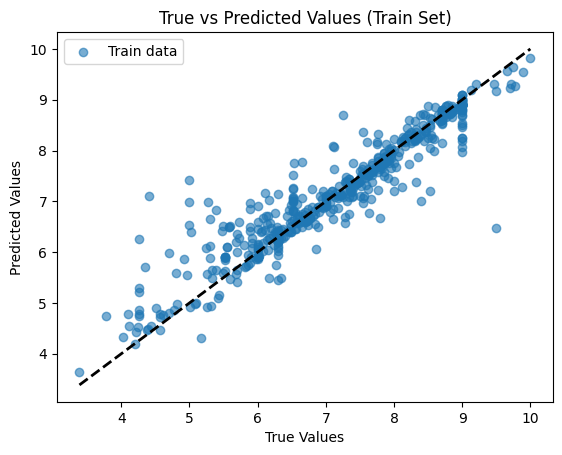


SVR Test Set Metrics:
Mean Squared Error: 0.35298445102133524
R2 Score: 0.7708746710814123


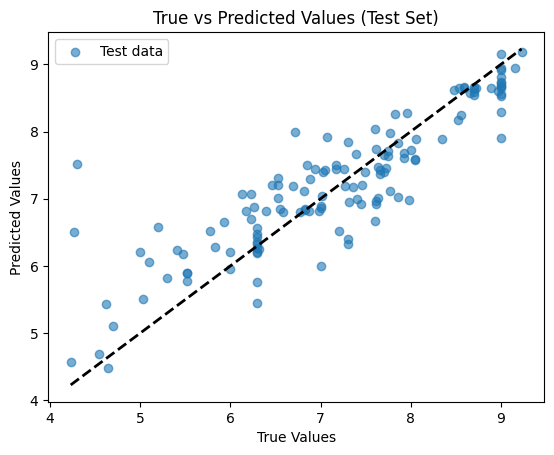

In [6]:

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, predicted_labels_train)
r2_train = r2_score(y_train, predicted_labels_train)
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("SVR Train Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R2 Score:", r2_train)

# Plot true vs. predicted values for training set
plt.figure()
plt.scatter(y_train, predicted_labels_train, label='Train data', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Train Set)')
plt.legend()
plt.show()

# Predictions and metrics for test set
predicted_labels_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, predicted_labels_test)
r2_test = r2_score(y_test, predicted_labels_test)

print("\nSVR Test Set Metrics:")
print("Mean Squared Error:", mse_test)
print("R2 Score:", r2_test)

# Plot true vs. predicted values for test set
plt.figure()
plt.scatter(y_test, predicted_labels_test, label='Test data', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Test Set)')
plt.legend()
plt.show()

# **internal KFOLD cross validation with 5 folds**

In [7]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt



# Define the SVR model
model = SVR(kernel='rbf', C=1, epsilon=0.2, gamma='scale')

# Number of splits for KFold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Initialize lists to store evaluation metrics for each fold
r2_scores_train = []
mean_squared_errors_train = []
mean_absolute_errors_train = []
r2_scores_test = []
mean_squared_errors_test = []
mean_absolute_errors_test = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data), 1):
    X_train, X_test = merged_data[train_index], merged_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics for this fold
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # Append metrics for this fold to the lists
    r2_scores_train.append(train_r2)
    mean_squared_errors_train.append(train_mse)
    mean_absolute_errors_train.append(train_mae)
    r2_scores_test.append(test_r2)
    mean_squared_errors_test.append(test_mse)
    mean_absolute_errors_test.append(test_mae)

    # Print metrics for training set
    print(f"======== Fold {fold} ======")
    print("Training Set Metrics:")
    print(f'R-Squared: {train_r2}')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

    # Print metrics for testing set
    print("\nTesting Set Metrics:")
    print(f'R-Squared: {test_r2}')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

======== Fold 1 ======
Training Set Metrics:
R-Squared: 0.8821328694679921
Mean Squared Error (MSE): 0.2077457939114756
Mean Absolute Error (MAE): 0.30490882807900915
Mean Absolute Percentage Error (MAPE): 21.37403833055017

Testing Set Metrics:
R-Squared: 0.7734635918983037
Mean Squared Error (MSE): 0.34899602775271954
Mean Absolute Error (MAE): 0.43416523309368066
Mean Absolute Percentage Error (MAPE): 19.049651396755095
======== Fold 2 ======
Training Set Metrics:
R-Squared: 0.9013069690857252
Mean Squared Error (MSE): 0.17010840903156624
Mean Absolute Error (MAE): 0.2928632253788859
Mean Absolute Percentage Error (MAPE): 20.94664707655802

Testing Set Metrics:
R-Squared: 0.7218300125661876
Mean Squared Error (MSE): 0.4620598779741426
Mean Absolute Error (MAE): 0.46324275405052895
Mean Absolute Percentage Error (MAPE): 21.513419273478732
======== Fold 3 ======
Training Set Metrics:
R-Squared: 0.888397730305462
Mean Squared Error (MSE): 0.18854044657043273
Mean Absolute Error (MAE): 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Saving the model **

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


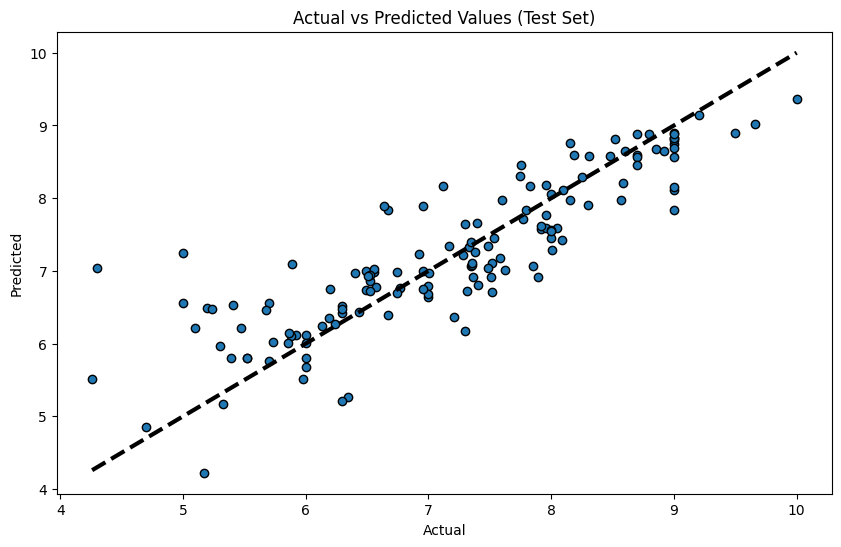

Training Set Metrics:
R-Squared: 0.8826254278926865
Adjusted R-Squared: 0.8646599321619752
Mean Squared Error (MSE): 0.20413217932839298
Mean Absolute Error (MAE): 0.3020736031958114
Mean Absolute Percentage Error (MAPE): 21.314647030406476

Testing Set Metrics:
R-Squared: 0.7486978128491388
Adjusted R-Squared: 0.4631271456322512
Mean Squared Error (MSE): 0.3815269079321537
Mean Absolute Error (MAE): 0.4492223411456887
Mean Absolute Percentage Error (MAPE): 19.085580670839335


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming merged_data and merged_y are your datasets
# Replace the following lines with your actual data loading process
# merged_data = pd.read_csv('path_to_merged_data.csv')
# merged_y = pd.read_csv('path_to_merged_y.csv')

# Sample data for demonstration purposes
# merged_data = pd.DataFrame({'feature1': range(100), 'feature2': range(100, 200)})
# merged_y = pd.Series(range(100))

# Ensure your features and target are in appropriate formats
X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = SVR(kernel='rbf' , C=1.0, epsilon=0.2 , gamma= 'scale')
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')
